# **Income Classification**

In [1]:
#import required libraries 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [2]:
#read the csv file and store in data variable as dataframe 

data = pd.read_csv("income_evaluation.csv")

In [3]:
#describe the numerical variables for mean, median, stnd deviation, min, max values etc

data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#describe about the number of variables and data types of the variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## EDA and Pre-Processing

In [5]:
#renaming columns names to appropriate semantic and copy the columns to original variable

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = col_names

In [6]:
#list the categorical variables 

categorical = [var for var in data.columns if data[var].dtype!='O']
print(categorical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [7]:
#list the numerical variables

numerical = [var for var in data.columns if data[var].dtype=='O']
print(numerical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


<AxesSubplot:>

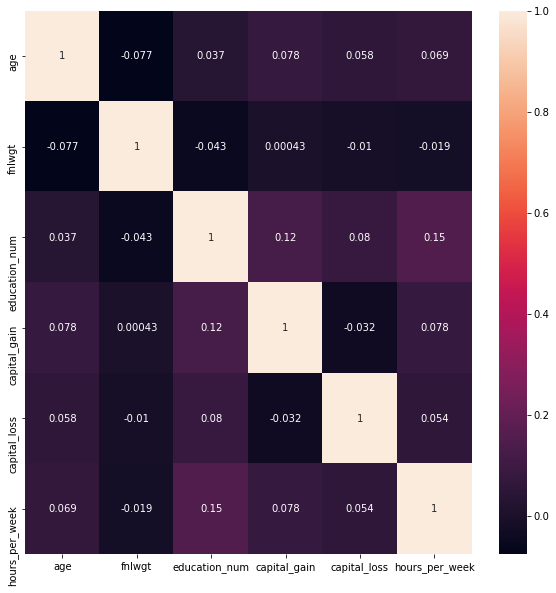

In [8]:
#showcase correlation between variables using heatmap

plt.figure(figsize=(10,10))
co_relation = data.corr()
sns.heatmap(co_relation,annot=True)

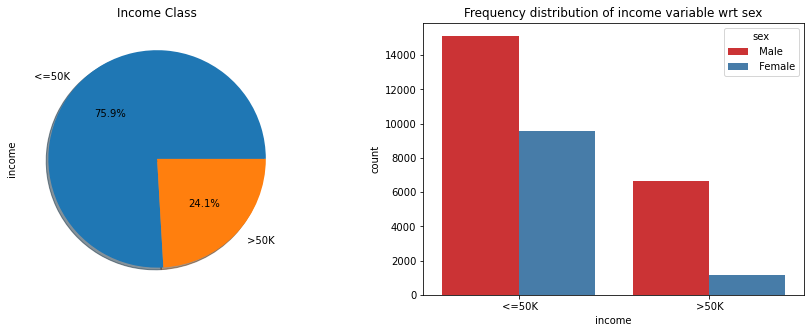

In [9]:
#frequency distribution of Target variable, Income wrt to gender

f,ax=plt.subplots(1,2,figsize=(15,5))

ax[0] = data['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Class')

ax[1] = sns.countplot(x="income", hue="sex", data=data, palette="Set1")
ax[1].set_title("Frequency distribution of income variable wrt sex")


plt.show()

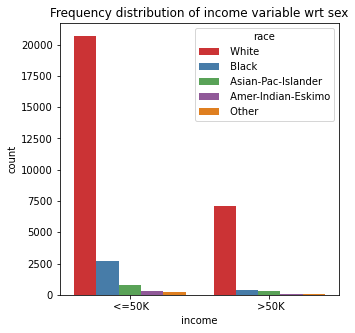

In [10]:
#frequency distribution of target variable wrt race

f,ax=plt.subplots(figsize=(5,5))

ax= sns.countplot(x="income", hue="race", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")


plt.show()

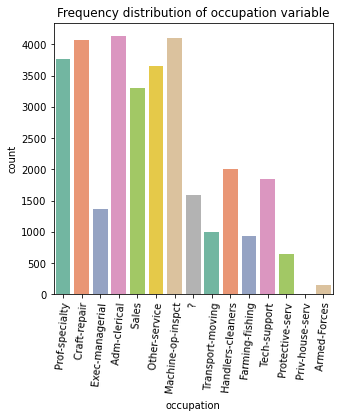

In [11]:
#frequency distribution of occupation variable

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x="occupation", data=data, palette="Set2")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data.occupation.value_counts().index, rotation=85)
plt.show()

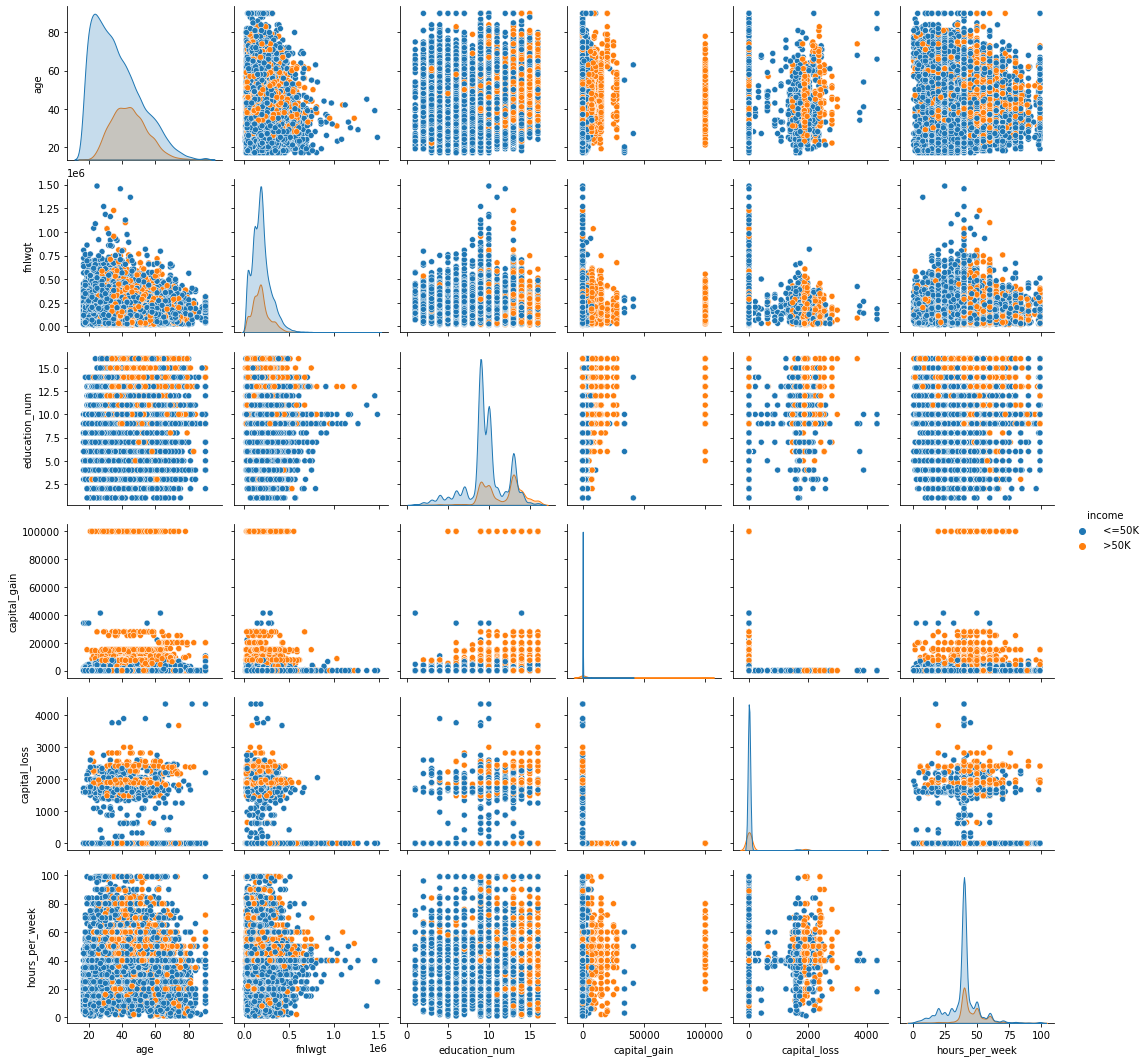

In [12]:
#pair wise plot to display the normality of variables. age and final weight variables are positively skewed

sns.pairplot(data, hue="income")
plt.show()

In [13]:
#handling positively skewed variables using square root transformation

data.age = np.sqrt(data.age)
data.fnlwgt = np.sqrt(data.fnlwgt)

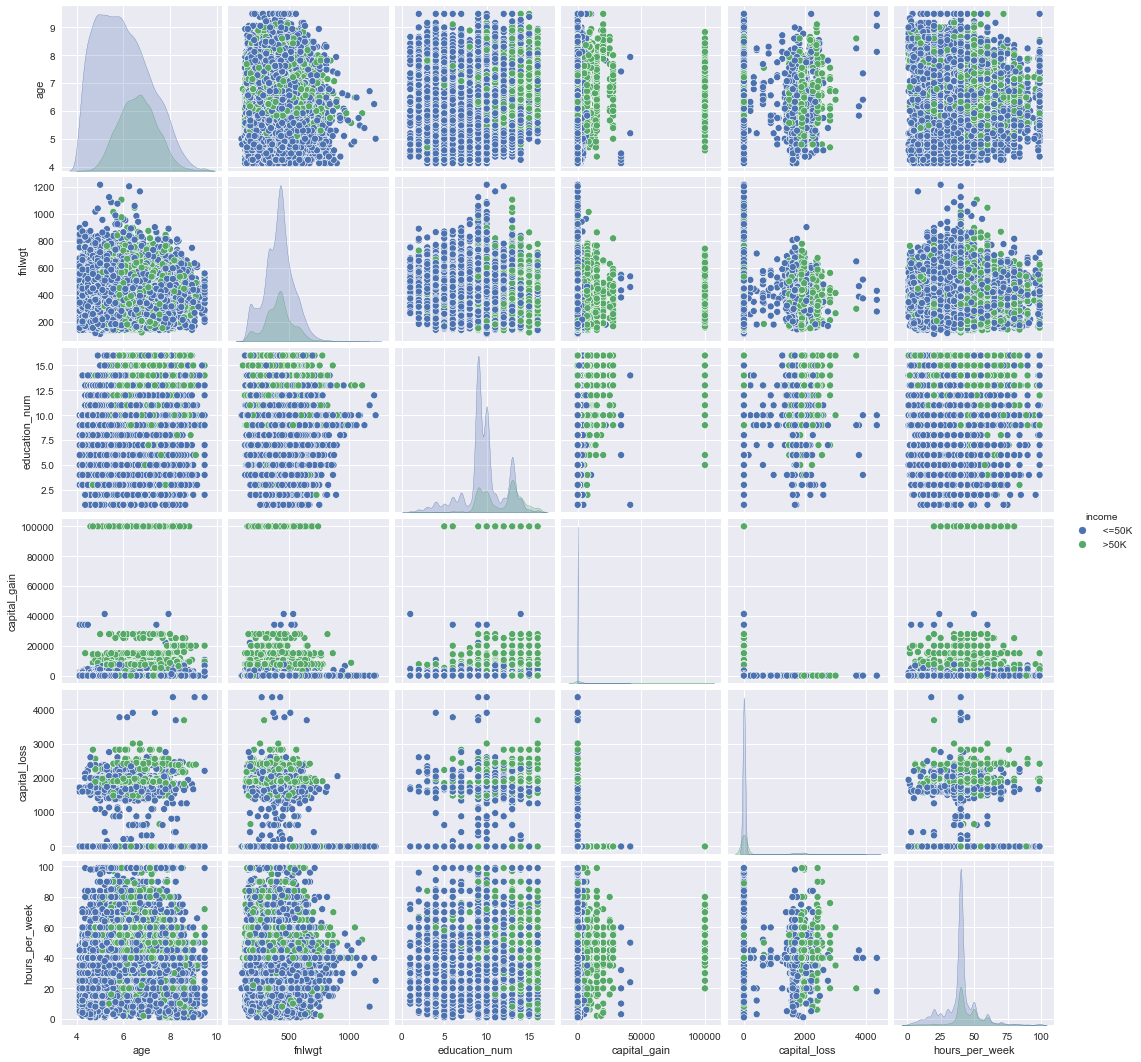

In [149]:
#Normality of features after transformation

sns.pairplot(data, hue="income")
plt.show()

In [14]:
#Total number of missing values

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [15]:
#encode target variable to boolean and print the head of data

data['income']=[1 if x ==' >50K' else 0 for x in data['income'].values]
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,6.244998,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,7.071068,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,6.164414,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,7.280110,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,5.291503,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
#Replace the unwanted '?' with NaN values using replace function

data.occupation.unique()
data.workclass.unique()
data['occupation'].replace(' ?', np.NaN, inplace=True)
data['workclass'].replace(' ?', np.NaN, inplace=True)
data['native_country'].replace(' ?', np.NaN, inplace=True)

In [17]:
#split the processed data into train and test data

train,test = train_test_split(data, test_size=0.2,random_state = 1)

In [18]:
#split the target variable from predictor variables

x_train = train.drop(['income'], axis=1)
y_train = train['income']
x_test = test.drop(['income'],axis=1)
y_test = test['income']

In [19]:
#display the columns of our traindata

x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [20]:
#Handle missing values using Simple Imputation's most frequent method

imp = SimpleImputer(strategy="most_frequent")
traindata = pd.DataFrame(imp.fit_transform(x_train))
traindata.columns = x_train.columns

testdata = pd.DataFrame(imp.fit_transform(x_test))
testdata.columns = x_test.columns
# print(traindata)

In [21]:
#encode categorical variables using Label Encoder. Eg. Male - 1 and Female - 0

enc = LabelEncoder()
x_trainwork = pd.DataFrame(enc.fit_transform(traindata["workclass"]))
x_testwork = pd.DataFrame(enc.fit_transform(testdata["workclass"]))

traindata["workclass"] = x_trainwork[0]
testdata["workclass"]= x_testwork[0]

x_trainedu = pd.DataFrame(enc.fit_transform(traindata["education"]))
x_testedu = pd.DataFrame(enc.fit_transform(testdata["education"]))

traindata["education"] = x_trainedu[0]
testdata["education"]= x_testedu[0]

x_trainocc = pd.DataFrame(enc.fit_transform(traindata["occupation"]))
x_testocc = pd.DataFrame(enc.fit_transform(testdata["occupation"]))

traindata["occupation"] = x_trainocc[0]
testdata["occupation"]= x_testocc[0]

x_trainrel = pd.DataFrame(enc.fit_transform(traindata["relationship"]))
x_testrel = pd.DataFrame(enc.fit_transform(testdata["relationship"]))

traindata["relationship"] = x_trainrel[0]
testdata["relationship"]= x_testrel[0]

x_trainrel = pd.DataFrame(enc.fit_transform(traindata["relationship"]))
x_testrel = pd.DataFrame(enc.fit_transform(testdata["relationship"]))

traindata["relationship"] = x_trainrel[0]
testdata["relationship"]= x_testrel[0]

x_trainsex = pd.DataFrame(enc.fit_transform(traindata["sex"]))
x_testsex = pd.DataFrame(enc.fit_transform(testdata["sex"]))

traindata["sex"] = x_trainsex[0]
testdata["sex"]= x_testsex[0]

x_trainnat = pd.DataFrame(enc.fit_transform(traindata["native_country"]))
x_testnat = pd.DataFrame(enc.fit_transform(testdata["native_country"]))

traindata["native_country"] = x_trainnat[0]
testdata["native_country"]= x_testnat[0]

x_trainmar = pd.DataFrame(enc.fit_transform(traindata["marital_status"]))
x_testmar = pd.DataFrame(enc.fit_transform(testdata["marital_status"]))

traindata["marital_status"] = x_trainmar[0]
testdata["marital_status"]= x_testmar[0]

x_trainrace = pd.DataFrame(enc.fit_transform(traindata["race"]))
x_testrace = pd.DataFrame(enc.fit_transform(testdata["race"]))

traindata["race"] = x_trainrace[0]
testdata["race"]= x_testrace[0]

In [22]:
#Display the pre-processed data

traindata.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,6.245,5,434.248,1,7,2,13,0,4,1,0,0,40,37
1,7.34847,5,324.052,9,13,2,3,0,4,1,0,0,40,37
2,5.65685,3,395.555,11,9,2,11,0,4,1,0,1902,50,37
3,6.7082,5,179.366,15,10,4,4,1,4,1,0,0,50,37
4,7.74597,3,382.98,0,6,2,5,0,2,1,0,0,40,37


In [23]:
#Feature Selection: Disply the best features in descending order using SelectKBest 

bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(traindata,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(traindata.columns)
featuresScores = pd.concat([dfcolumns,dfscores],axis=1)
featuresScores.columns = ['Columns','Score']
print(featuresScores.nlargest(15,'Score'))

           Columns         Score
10    capital_gain  6.480026e+07
11    capital_loss  1.080051e+06
12  hours_per_week  5.406018e+03
7     relationship  2.910946e+03
4    education_num  1.936963e+03
5   marital_status  8.920931e+02
9              sex  4.025535e+02
0              age  3.215916e+02
3        education  2.476961e+02
6       occupation  6.347297e+01
8             race  2.599753e+01
13  native_country  1.499503e+01
2           fnlwgt  1.825604e+00
1        workclass  2.376624e-01


In [24]:
#Remove unwanted variables (least important variables: workclass and native_country). Fnlwgt has some influence over the model 
#due to correlation

traindata = traindata.drop(['workclass','native_country'],axis=1)
testdata = testdata.drop(['workclass','native_country'],axis=1)

In [25]:
#Perform feature scaling using robust scalar to process all the varibales between -1 and +1

cols = traindata.columns
scaler = RobustScaler()

traindata = scaler.fit_transform(traindata)

testdata = scaler.transform(testdata)
traindata = pd.DataFrame(traindata, columns=[cols])
testdata = pd.DataFrame(testdata, columns=[cols])

# Data Mining

In [26]:
#Decision Tree Classifier

model1 = DecisionTreeClassifier(criterion="entropy",max_depth=10)
model1.fit(traindata,y_train)
y_pred1 = model1.predict(testdata)

print("Test Accuracy of decision tree model regarding Income prediction: ", metrics.accuracy_score(y_test,y_pred1))

Test Accuracy of decision tree model regarding Income prediction:  0.8509135575003839


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5026
           1       0.72      0.56      0.63      1487

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



<AxesSubplot:>

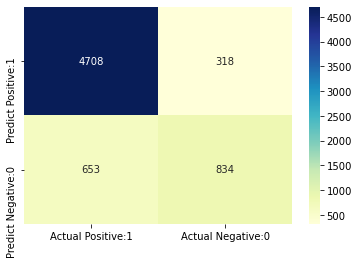

In [27]:
#Evaluation of Decision Tree Classifier

cm1 = confusion_matrix(y_test, y_pred1)
print(metrics.classification_report(y_test, y_pred1))

cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [28]:
#Random Forest Classifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(traindata, y_train)
y_pred2 = rfc.predict(testdata)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred2)))

Model accuracy score with 100 decision-trees : 0.8586


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5026
           1       0.71      0.64      0.68      1487

    accuracy                           0.86      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.86      0.86      6513



<AxesSubplot:>

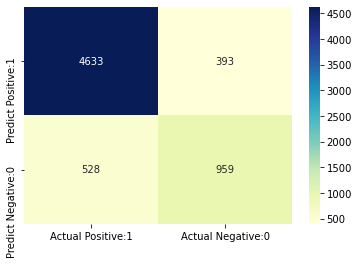

In [29]:
#Evaluation of Random Forest Classifier

cm2 = confusion_matrix(y_test, y_pred2)
print(metrics.classification_report(y_test, y_pred2))
cm_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
#KNeighbors Classifier. Prediction for K=10 neighbors in loop

for i in range(1,11):
    #Train the model
    neigh=KNeighborsClassifier(n_neighbors=i).fit(traindata,np.ravel(y_train))
    y_pred3=neigh.predict(testdata)
    acc=metrics.accuracy_score(y_test,y_pred3)
    print(i,acc)

1 0.8192845079072624
2 0.844311377245509
3 0.8393981268232765
4 0.8530631045601106
5 0.8499923230462153
6 0.8541378780899739
7 0.8536772608628896
8 0.8572086596038692
9 0.8539843390142792
10 0.8556732688469215


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5026
           1       0.72      0.60      0.66      1487

    accuracy                           0.86      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.86      0.85      6513



<AxesSubplot:>

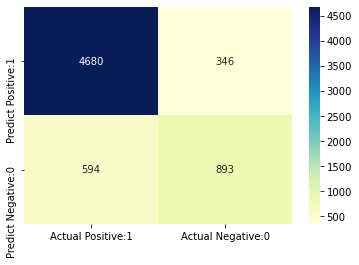

In [31]:

cm3 = confusion_matrix(y_test, y_pred3)
# print('Confusion matrix\n\n', cm)
print(metrics.classification_report(y_test, y_pred3))

cm_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [170]:
#XGB Classifier Model

model = xgb.XGBClassifier()
xgmfit = model.fit(traindata, y_train)
y_pred4 = model.predict(testdata)
accuracy = metrics.accuracy_score(y_test, y_pred4)
print("Accuracy of XGB Classifier with default parameters:",(accuracy * 100.0))

[02:35:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB Classifier with default parameters: 86.93382465837556


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.73      0.67      0.70      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



<AxesSubplot:>

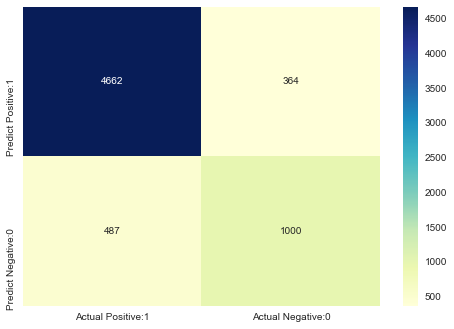

In [171]:
#Evaluation of XGB Classifier

cm4 = confusion_matrix(y_test, y_pred4)
print(metrics.classification_report(y_test, y_pred4))
cm_matrix = pd.DataFrame(data=cm4, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [176]:
#Plotting ROC curves for all the models to find the best model

fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, y_pred1, pos_label=1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, y_pred2, pos_label=1)
fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, y_pred3, pos_label=1)
fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, y_pred4, pos_label=1)

auc1 = metrics.roc_auc_score(y_test, y_pred1)
auc2 = metrics.roc_auc_score(y_test, y_pred2)
auc3 = metrics.roc_auc_score(y_test, y_pred3)
auc4 = metrics.roc_auc_score(y_test, y_pred4)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

print(" AUC for Decision Tree:",auc1,"\n AUC for Random Forest:", auc2,"\n AUC for KNN Classifier:", auc3,"\n AUC for XGB Classifier:", auc4)

 AUC for Decision Tree: 0.7465884194388239 
 AUC for Random Forest: 0.7833646343653218 
 AUC for KNN Classifier: 0.7658479872383845 
 AUC for XGB Classifier: 0.8000357789795686


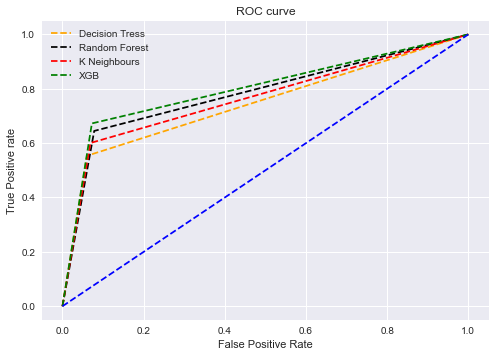

In [173]:

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tress')
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='K Neighbours')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [174]:
#Conclusion : XGB is the best model with accuracy of 87%, AUC score of 80%